## EXPLORATORY DATA ANALYSIS (all_seasons_details)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('all_season_details.csv', low_memory = False)

In [6]:
df.head(5)

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN


In [13]:
df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [17]:
df = df.drop(columns=['comment_id', 'text', 'preText', 'postText'])

In [19]:
df.head(3)

,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt
0,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [21]:
df.shape

(242550, 41)

In [25]:
df['isRetiredHurt'].unique()

array([False,  True])

### Tops Batsman by Runs

In [58]:
top_batsmen = df.groupby('batsman1_name')['batsman1_runs'].sum().sort_values(ascending=False).head(10)
print("Top 10 Batsmen by Runs:\n", top_batsmen)

Top 10 Batsmen by Runs:
 batsman1_name
Virat Kohli       133423
David Warner      126924
Shikhar Dhawan    126135
Rohit Sharma       97967
Chris Gayle        94477
Suresh Raina       86088
KL Rahul           85826
Ajinkya Rahane     80968
Gautam Gambhir     79674
AB de Villiers     76932
Name: batsman1_runs, dtype: int64


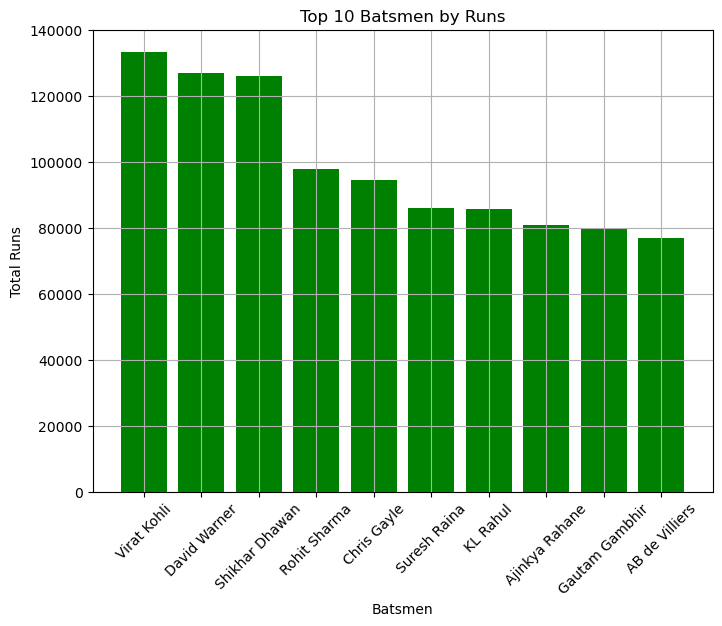

In [60]:
plt.figure(figsize=(8, 6))
plt.bar(top_batsmen.index, top_batsmen.values, color='green')
plt.title("Top 10 Batsmen by Runs")
plt.xlabel("Batsmen")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### \The top 10 batsman in the whole IPL matches are listed above

In [63]:
season_batsman_runs = df.groupby(['season', 'batsman1_name'])['batsman1_runs'].sum()
season_batsman_runs = season_batsman_runs.reset_index()
top_batsman_each_season = season_batsman_runs.sort_values(['season', 'batsman1_runs'], ascending=[True, False]).groupby('season').first()
print("Top Batsman in Each Season:\n", top_batsman_each_season)

Top Batsman in Each Season:
           batsman1_name  batsman1_runs
season                                
2008.0      Shaun Marsh          15551
2009.0   Matthew Hayden          11153
2010.0   Jacques Kallis          12463
2011.0      Chris Gayle          12520
2012.0      Chris Gayle          14735
2013.0      Chris Gayle          16284
2014.0    Robin Uthappa          12685
2015.0   Ajinkya Rahane          11748
2016.0      Virat Kohli          22369
2017.0     David Warner          13283
2018.0  Kane Williamson          13775
2019.0     David Warner          15633
2020.0         KL Rahul          15763
2021.0         KL Rahul          13433
2022.0      Jos Buttler          20687
2023.0     Shubman Gill          20821


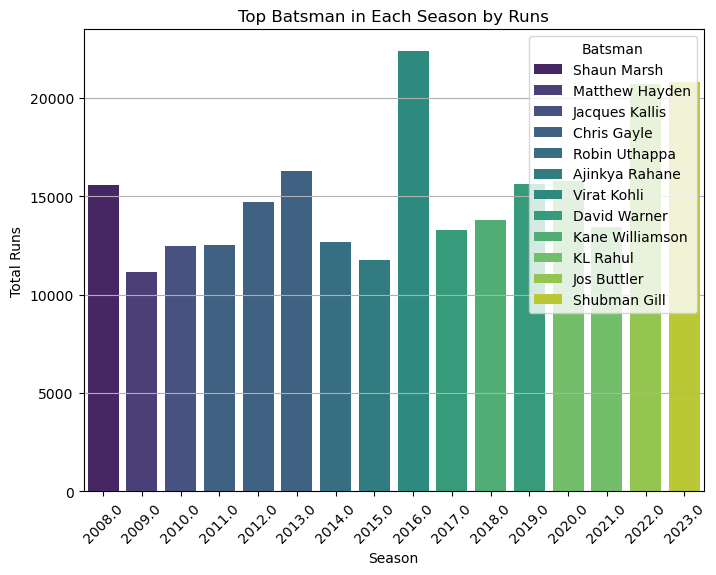

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(data=top_batsman_each_season, x='season', y='batsman1_runs', hue='batsman1_name', dodge=False, palette='viridis')
plt.title("Top Batsman in Each Season by Runs")
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.legend(title="Batsman")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### The above graph shows the best batsman in each season, with this we get that Virat Kohli has scored highest runs in 2016 surpassing other batsmen.

### Top Bowlers by Wicket

In [69]:
top_bowlers = df.groupby('bowler1_name')['bowler1_wkts'].sum().sort_values(ascending=False).head(10)
print("Top 10 Bowlers by Wickets:\n", top_bowlers)

Top 10 Bowlers by Wickets:
 bowler1_name
Yuzvendra Chahal       1966
Piyush Chawla          1960
Ravichandran Ashwin    1918
Amit Mishra            1875
Bhuvneshwar Kumar      1721
Sunil Narine           1693
Harbhajan Singh        1677
Dwayne Bravo           1668
Lasith Malinga         1614
Ravindra Jadeja        1554
Name: bowler1_wkts, dtype: int64


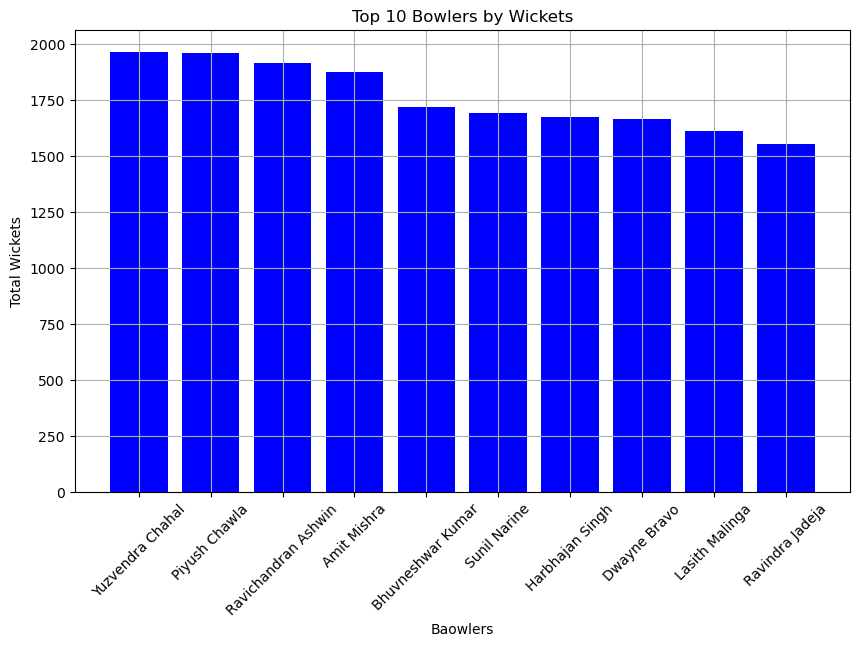

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(top_bowlers.index, top_bowlers.values, color='blue')
plt.title("Top 10 Bowlers by Wickets")
plt.xlabel("Baowlers")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [79]:
season_bowlers_wickets = df.groupby(['season', 'bowler1_name'])['bowler1_wkts'].sum()
season_bowlers_wickets = season_bowlers_wickets.reset_index()
top_bowlers_each_season = season_bowlers_wickets.sort_values(['season', 'bowler1_name'], ascending=[True, False]).groupby('season').first()
print("Top Batsman in Each Season:\n", top_bowlers_each_season)

Top Batsman in Each Season:
             bowler1_name  bowler1_wkts
season                                
2008.0       Zaheer Khan           142
2009.0       Zaheer Khan            60
2010.0       Zaheer Khan           115
2011.0       Zaheer Khan           135
2012.0       Zaheer Khan           179
2013.0       Zaheer Khan            39
2014.0       Zaheer Khan            55
2015.0       Zaheer Khan           101
2016.0       Zaheer Khan           101
2017.0       Zaheer Khan           113
2018.0  Yuzvendra Chahal           162
2019.0  Yuzvendra Chahal           184
2020.0  Yuzvendra Chahal           254
2021.0  Yuzvendra Chahal           167
2022.0  Yuzvendra Chahal           254
2023.0  Yuzvendra Chahal           201


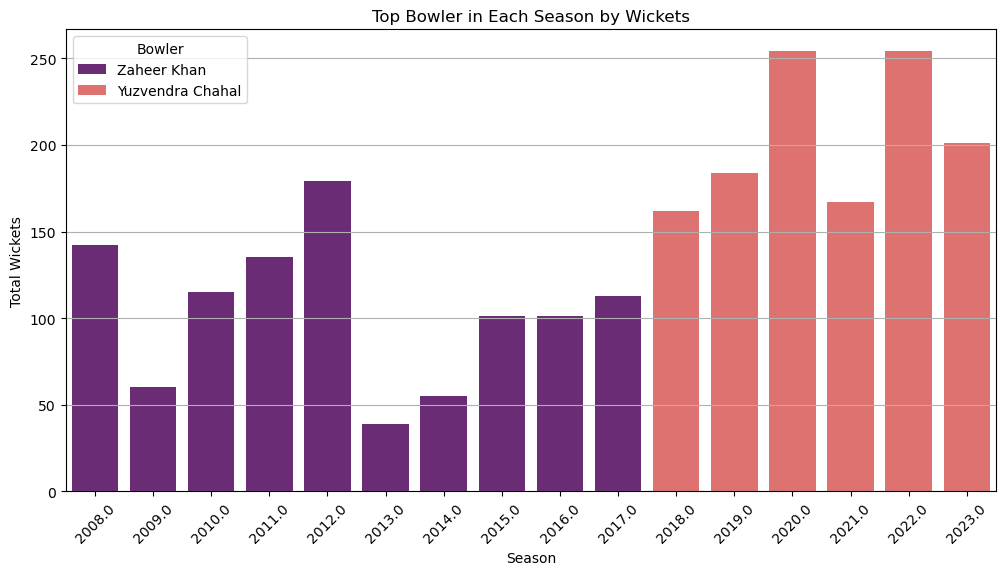

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_bowlers_each_season, x='season', y='bowler1_wkts', hue='bowler1_name', dodge=False, palette='magma')
plt.title("Top Bowler in Each Season by Wickets")
plt.xlabel("Season")
plt.ylabel("Total Wickets")
plt.legend(title="Bowler")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### From 2008 to 2017 we Zaheer Khan stayed consistent as Top bowler then from 2018 Yuzvendra chahal took the title

### Run Distribution by Over

In [87]:
run_distribution_by_over = df.groupby('over')['runs'].sum()
print("Run Distribution by Over:\n", run_distribution_by_over)

Run Distribution by Over:
 over
1     12293
2     14858
3     16392
4     17043
5     17161
6     17083
7     13726
8     14788
9     15327
10    15193
11    15451
12    15765
13    16016
14    16357
15    16841
16    17050
17    17639
18    18192
19    17615
20    14867
Name: runs, dtype: int64


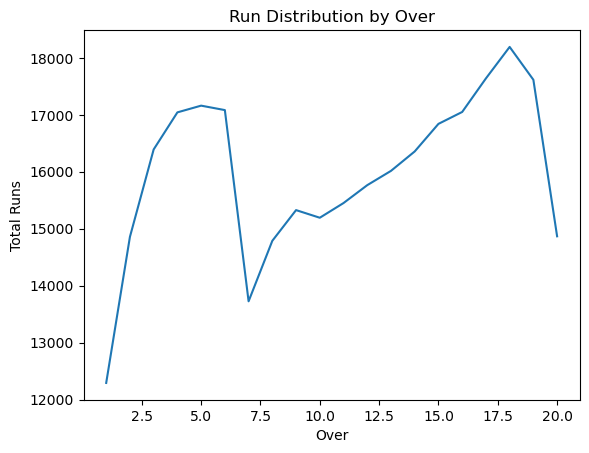

In [91]:
run_distribution_by_over.plot(kind='line', title='Run Distribution by Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.show()

#### The runs distribution is more in the last overs and then in the starting overs

In [95]:
run_distribution_by_over_season = df.groupby(['season', 'over'])['runs'].sum().reset_index()
print("Run Distribution by Over for Each Season:\n", run_distribution_by_over_season)

Run Distribution by Over for Each Season:
      season  over  runs
0    2008.0     1   703
1    2008.0     2   923
2    2008.0     3   826
3    2008.0     4   912
4    2008.0     5  1017
..      ...   ...   ...
315  2023.0    16  1291
316  2023.0    17  1368
317  2023.0    18  1321
318  2023.0    19  1362
319  2023.0    20  1076

[320 rows x 3 columns]


### Extras Breakdown

In [101]:
extras = df[['isWide', 'isNoball']].sum()  # Counting occurrences of wides and no-balls
print("Extras Breakdown:\n", extras)

Extras Breakdown:
 isWide      7601
isNoball    1001
dtype: int64


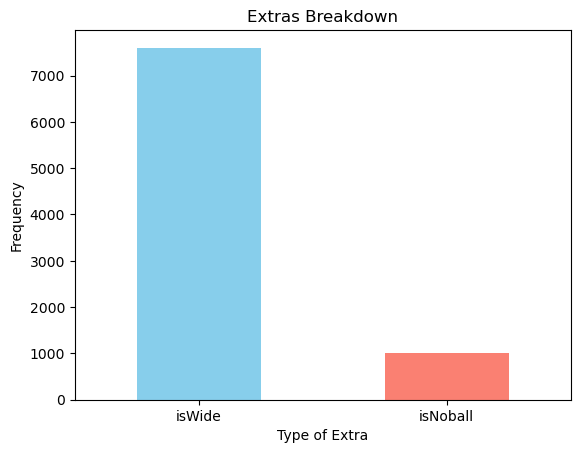

In [103]:
extras.plot(kind='bar', color=['skyblue', 'salmon'], title='Extras Breakdown')
plt.xlabel('Type of Extra')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x labels for clarity
plt.show()

In [111]:
extras_by_season = df.groupby('season')[['isWide', 'isNoball']].sum().reset_index()
print("Extras Breakdown by Season:\n", extras_by_season)

Extras Breakdown by Season:
     season  isWide  isNoball
0   2008.0     457        82
1   2009.0     434        73
2   2010.0     495        60
3   2011.0     501        83
4   2012.0     497        61
5   2013.0     476        59
6   2014.0     399        54
7   2015.0     447        49
8   2016.0     429        48
9   2017.0     418        38
10  2018.0     436        39
11  2019.0     395        59
12  2020.0     446        52
13  2021.0     460        76
14  2022.0     696        71
15  2023.0     597        95


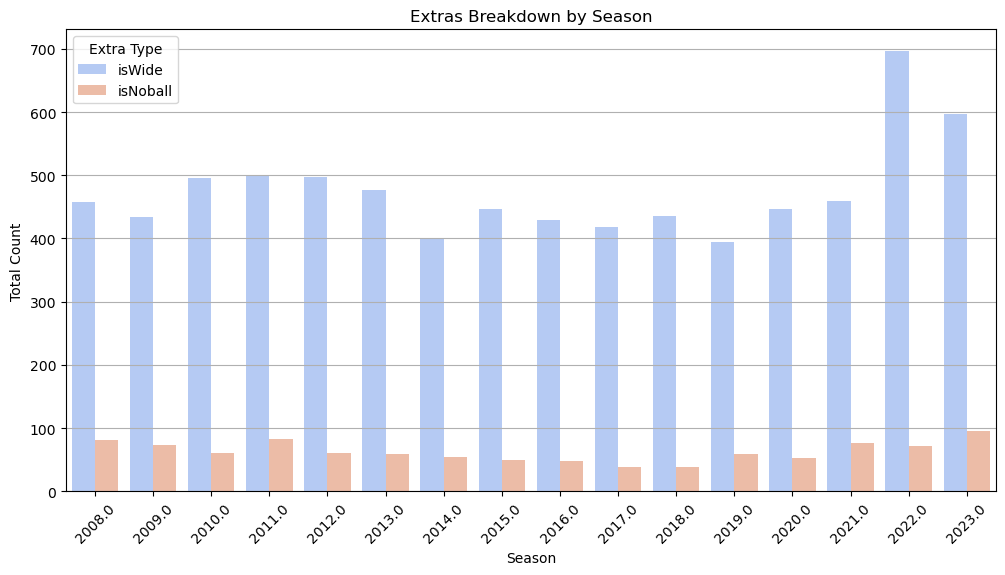

In [113]:
plt.figure(figsize=(12, 6))
extras_melted = extras_by_season.melt(id_vars='season', var_name='Extra Type', value_name='Count')
sns.barplot(data=extras_melted, x='season', y='Count', hue='Extra Type', palette='coolwarm')
plt.title("Extras Breakdown by Season")
plt.xlabel("Season")
plt.ylabel("Total Count")
plt.legend(title="Extra Type")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### The insight on most extra breakdowns are Wides and the high number of wides were in the year 2022 and high number of noball were in 2023

In [129]:
df.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt'],
      dtype='object')

## Performance by Team

### Home vs. Away Performance

In [135]:
home_performance = df.groupby('home_team')['runs'].value_counts().unstack().fillna(0)
away_performance = df.groupby('away_team')['runs'].value_counts().unstack().fillna(0)
print("Home Performance:\n", home_performance)
print("Away Performance:\n", away_performance)

Home Performance:
 runs             0        1       2      3       4     5       6     7
home_team                                                             
CSK        10296.0  12428.0  2133.0  129.0  3202.0  64.0  1361.0  11.0
DC          9954.0  12336.0  1724.0   97.0  3353.0  56.0  1370.0  10.0
GL          1122.0   1487.0   259.0   10.0   493.0   7.0   148.0   0.0
GT          1412.0   1851.0   285.0   14.0   528.0  13.0   265.0   1.0
KKR         9708.0  10928.0  1500.0   74.0  3145.0  52.0  1311.0   7.0
KXIP        7410.0   9108.0  1629.0   96.0  2745.0  35.0   971.0   0.0
Kochi        619.0    602.0    86.0    8.0   173.0   4.0    66.0   1.0
LSG         1299.0   1478.0   256.0   10.0   371.0   9.0   174.0   1.0
MI          9998.0  11599.0  1789.0   86.0  3366.0  56.0  1424.0  15.0
PBKS        1667.0   1977.0   315.0    7.0   576.0   8.0   264.0   3.0
PWI         2072.0   2300.0   348.0   16.0   523.0  15.0   203.0   1.0
RCB         9927.0  11897.0  1700.0   93.0  3209.0  53.0  

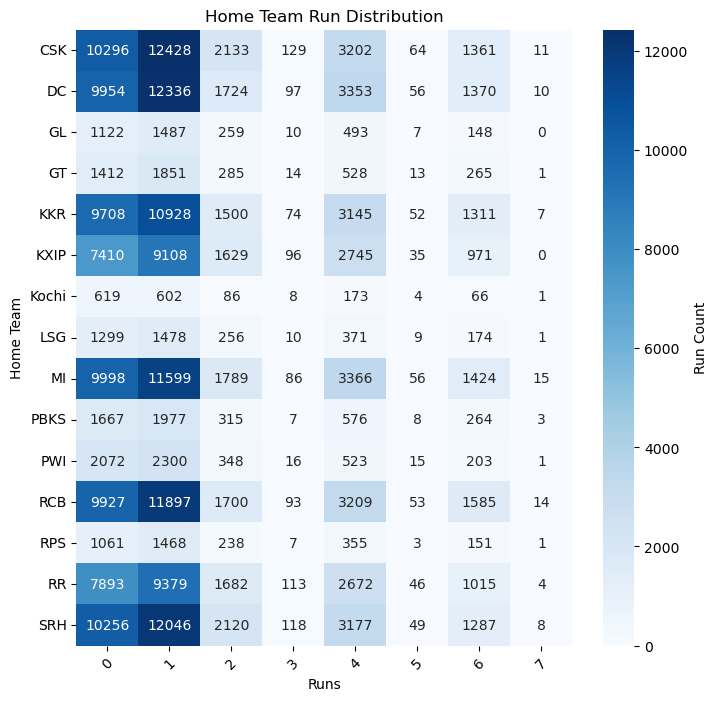

In [145]:
plt.figure(figsize=(8, 8))
sns.heatmap(home_performance, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Run Count'})
plt.title("Home Team Run Distribution")
plt.xlabel("Runs")
plt.ylabel("Home Team")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

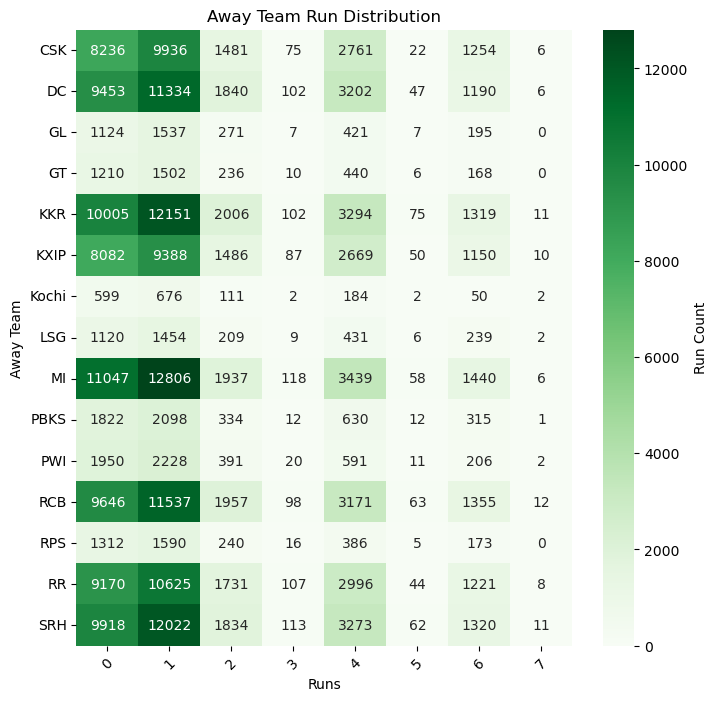

In [147]:
plt.figure(figsize=(8, 8))
sns.heatmap(away_performance, annot=True, fmt=".0f", cmap="Greens", cbar_kws={'label': 'Run Count'})
plt.title("Away Team Run Distribution")
plt.xlabel("Runs")
plt.ylabel("Away Team")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Performance Trends

In [28]:
performance_trends = df.groupby(['season', 'home_team'])['runs'].value_counts().unstack().fillna(0)
performance_trends

runs                  0      1      2    3      4    5      6    7
season home_team                                                  
2008.0 CSK        785.0  846.0  156.0  9.0  260.0  9.0   98.0  2.0
       DC         491.0  662.0   88.0  6.0  225.0  2.0   76.0  0.0
       KKR        639.0  611.0   63.0  3.0  185.0  7.0   53.0  0.0
       KXIP       572.0  679.0  112.0  6.0  228.0  4.0  100.0  0.0
       MI         579.0  563.0   77.0  6.0  186.0  3.0   76.0  2.0
...                 ...    ...    ...  ...    ...  ...    ...  ...
2023.0 MI         433.0  607.0   70.0  4.0  215.0  2.0  112.0  4.0
       PBKS       454.0  576.0  105.0  3.0  209.0  3.0   90.0  3.0
       RCB        495.0  756.0  114.0  1.0  218.0  1.0  133.0  0.0
       RR         510.0  706.0  112.0  4.0  204.0  3.0   87.0  0.0
       SRH        590.0  684.0  109.0  5.0  229.0  5.0   80.0  1.0

[135 rows x 8 columns]

In [34]:
consistency_batsman1 = df.groupby('batsman1_name')['batsman1_runs'].agg(['mean', 'std']).sort_values(by = 'mean', ascending = False).head()
consistency_batsman1.reset_index(inplace=True)
consistency_batsman1

,batsman1_name,mean,std
0,Vivrant Sharma,31.367347,22.285733
1,Hashim Amla,30.640288,26.586219
2,Devon Conway,30.038864,23.698297
3,Jos Buttler,27.368725,25.351677
4,KL Rahul,27.048850,23.002778


#### The top bats_man who score consistently scores highest average runs across games, this way we could find top performers

In [37]:
consistency_batsman1_season = (
    df.groupby(['season', 'batsman1_name'])['batsman1_runs']
    .agg(['mean', 'std'])
    .sort_values(by=['season', 'mean'], ascending=[True, False])
    .groupby('season')
    .head(5)
    .reset_index()
)
consistency_batsman1_season

,season,batsman1_name,mean,std
0,2008.0,Brendon McCullum,55.406250,46.434692
1,2008.0,Shaun Marsh,34.404867,26.909016
2,2008.0,Simon Katich,33.527778,25.686064
3,2008.0,Michael Hussey,33.160000,30.393287
4,2008.0,Andrew Symonds,32.270270,33.759294
...,...,...,...,...
75,2023.0,Shubman Gill,35.774914,28.421693
76,2023.0,Yashasvi Jaiswal,34.905852,25.596930
77,2023.0,Virat Kohli,32.367865,23.537294
78,2023.0,Vivrant Sharma,31.367347,22.285733


In [48]:
consistency_batsman1_season[consistency_batsman1_season['season'] == 2008]


,season,batsman1_name,mean,std
0,2008.0,Brendon McCullum,55.406250,46.434692
1,2008.0,Shaun Marsh,34.404867,26.909016
2,2008.0,Simon Katich,33.527778,25.686064
3,2008.0,Michael Hussey,33.160000,30.393287
4,2008.0,Andrew Symonds,32.270270,33.759294


#### The top batsman who are consistent in the year 2008

### Total Boundaries each season

In [13]:
boundaries = df[df['isBoundary'] == True]
total_boundaries = boundaries.groupby('season').size().reset_index(name='total_boundaries')
total_boundaries

,season,total_boundaries
0,2008.0,2320
1,2009.0,1816
2,2010.0,2272
3,2011.0,2547
4,2012.0,2628
5,2013.0,2714
6,2014.0,2264
7,2015.0,2285
8,2016.0,2261
9,2017.0,2305


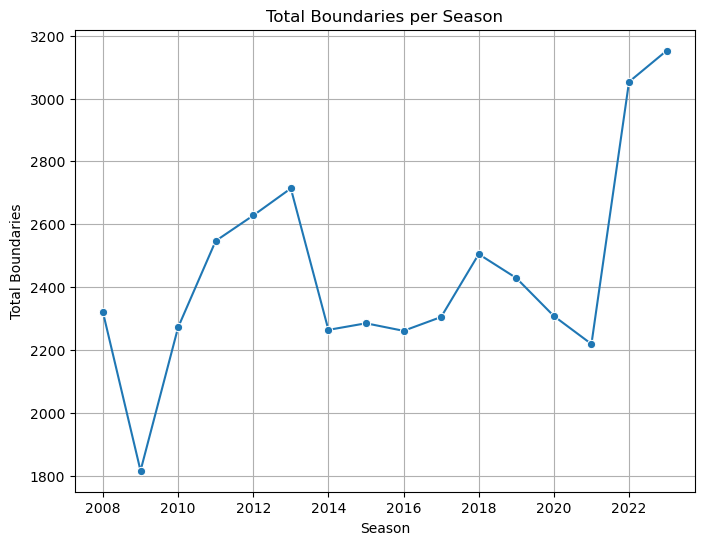

In [23]:
plt.figure(figsize=(8,6))
sns.lineplot(data=total_boundaries, x='season', y='total_boundaries', marker='o')
plt.title('Total Boundaries per Season')
plt.xlabel('Season')
plt.ylabel('Total Boundaries')
plt.grid(True)
plt.show()

#### The insight for this data is that the higher boundaries was seen in 2022 and lesser boundary in 2008. This gives the idea about how efficient the team has become over the times and range of boundaries had up and downs but increased over the last year